In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.graph_objs as go

In [8]:
data = pd.read_csv('/content/lung_cancer_examples.csv')

In [3]:
data.info()
print("\n")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB




,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [4]:
data.shape

(59, 7)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



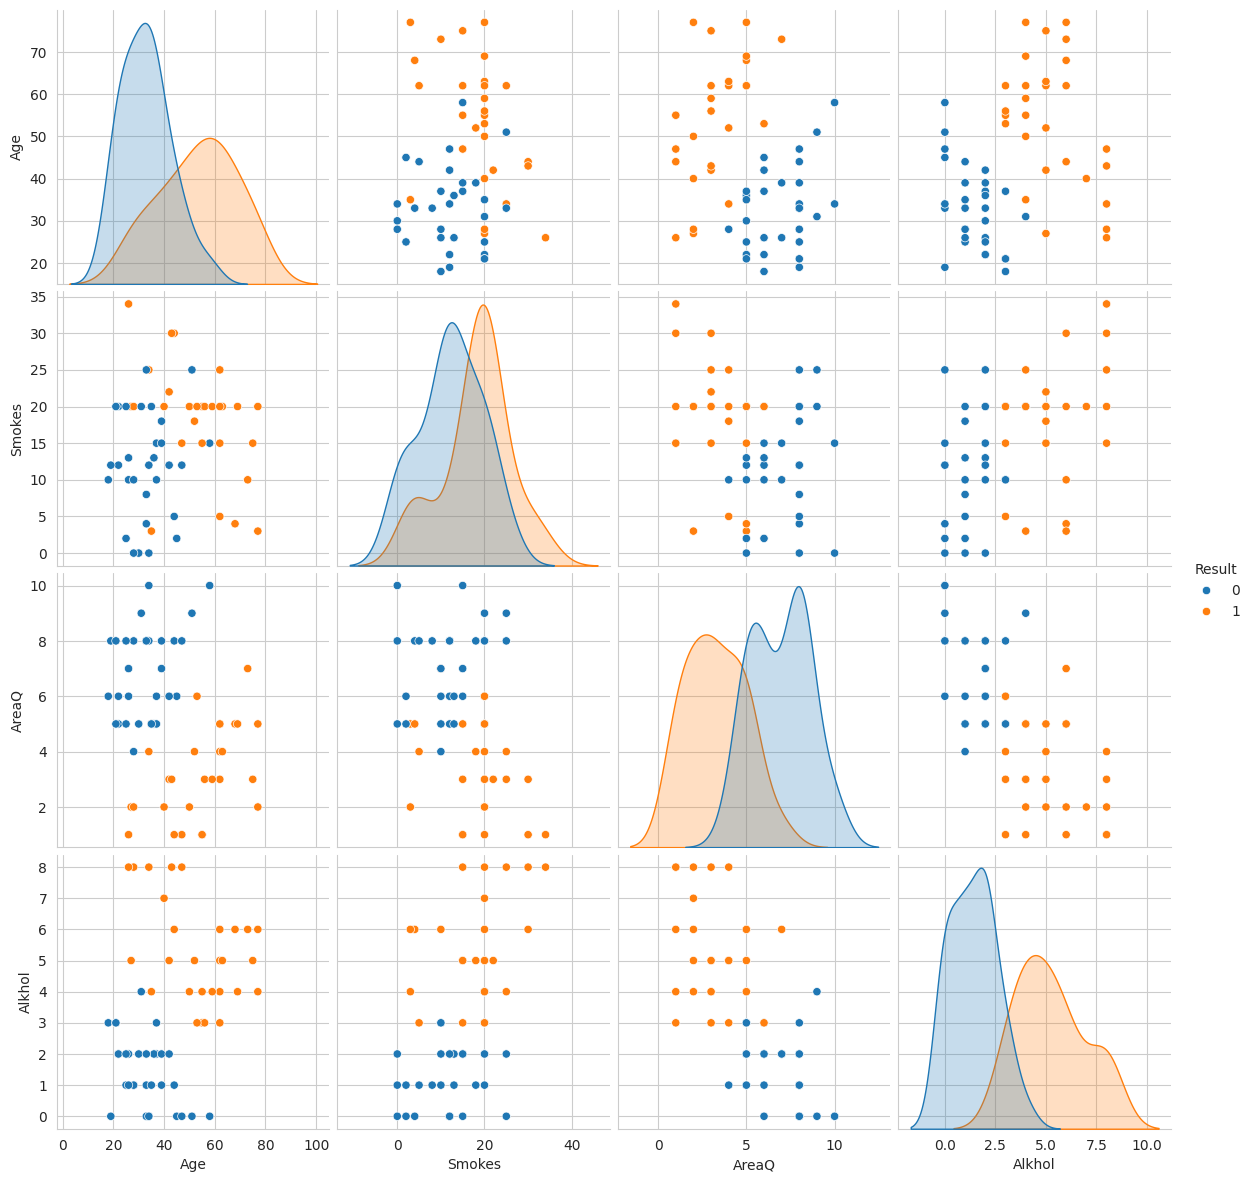

In [5]:
#Visualize the Data
# Lets see the distribution of Data about the persons who are suffering from
# Lung Cancer or Not

labels = data['Result'].value_counts()[:].index
values = data['Result'].value_counts()[:].values

colors=['#2678bf', '#98adbf']

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent",
                            insidetextorientation="radial", marker=dict(colors=colors))])

fig.show()
# pairplot
sns.set_style("whitegrid")
sns.pairplot(data,hue="Result",size=3);
plt.show()

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [7]:
# Binning example for age column
bins = [0, 40, 60, 100]  # Define the bin edges
labels = ['Young', 'Middle-aged', 'Senior']  # Labels for the bins
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)
print(data['age_group'])

0           Young
1           Young
2           Young
3           Young
4          Senior
5           Young
6     Middle-aged
7           Young
8     Middle-aged
9     Middle-aged
10          Young
11          Young
12          Young
13          Young
14          Young
15          Young
16    Middle-aged
17          Young
18         Senior
19         Senior
20    Middle-aged
21          Young
22          Young
23    Middle-aged
24         Senior
25          Young
26          Young
27          Young
28    Middle-aged
29          Young
30          Young
31    Middle-aged
32    Middle-aged
33         Senior
34          Young
35          Young
36    Middle-aged
37         Senior
38          Young
39          Young
40    Middle-aged
41    Middle-aged
42         Senior
43         Senior
44          Young
45          Young
46          Young
47          Young
48    Middle-aged
49         Senior
50    Middle-aged
51    Middle-aged
52          Young
53          Young
54          Young
55        

In [9]:
data = data.drop(['Name','Surname'], axis =1 )
data


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


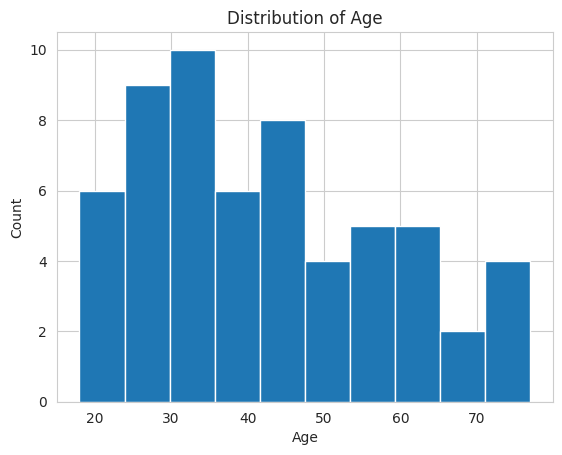

In [10]:
# Histogram of age
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


In [11]:
# Separate the features and the target variable
X = data.drop('Result', axis=1)
y = data['Result']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components
X_pca = pca.fit_transform(X_encoded)

In [12]:
data.Result.value_counts() # 1 lung cancer  0 not lung cancer

Result
0    31
1    28
Name: count, dtype: int64

<Axes: xlabel='Result'>

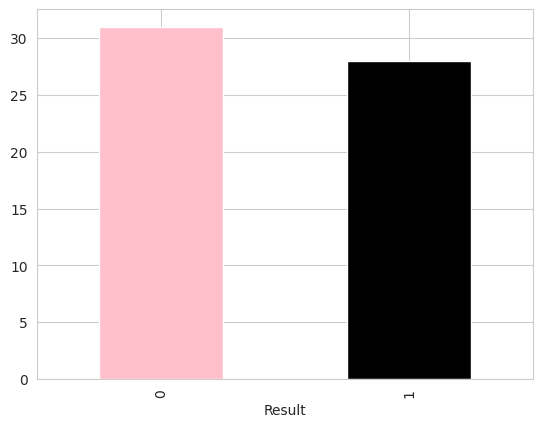

In [13]:
data.Result.value_counts().plot(kind="bar", color=["pink", "black"])

In [14]:
data.head() # first 5 Rows

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


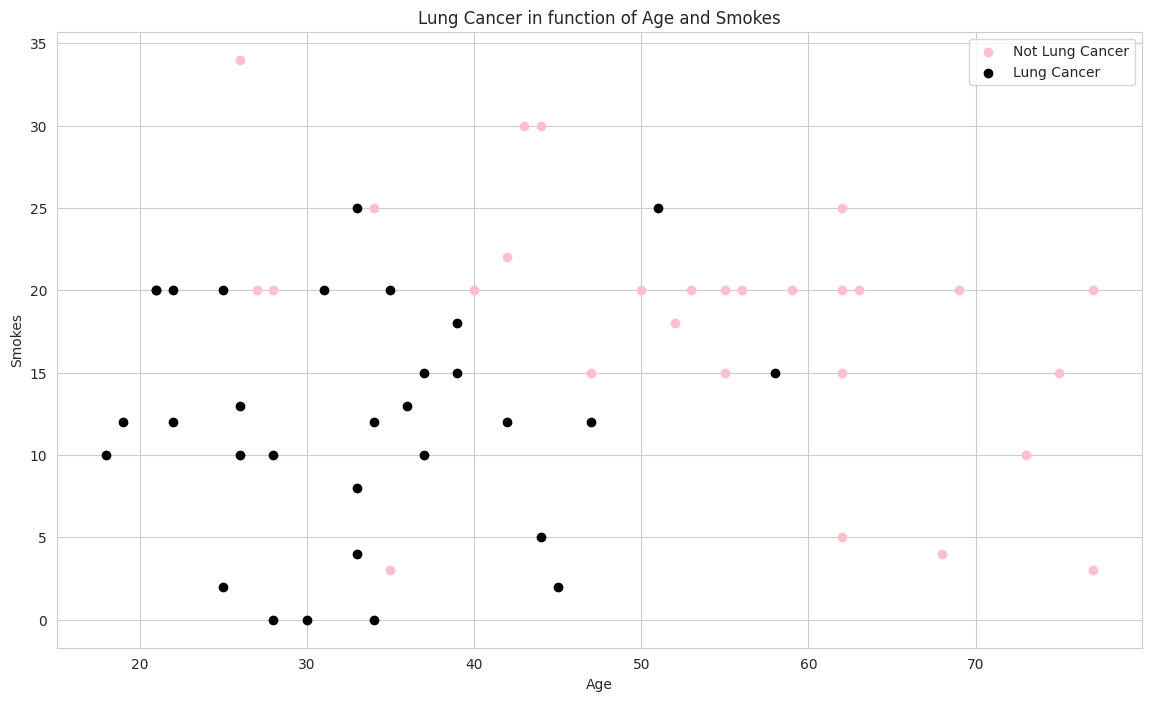

In [15]:
plt.figure(figsize=(14,8))
plt.scatter(data.Age[data.Result==1],
            data.Smokes[data.Result==1],
            c="pink")
plt.scatter(data.Age[data.Result==0],
            data.Smokes[data.Result==0],
            c="black")
plt.title("Lung Cancer in function of Age and Smokes")
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend(["Not Lung Cancer","Lung Cancer"]);

<Axes: >

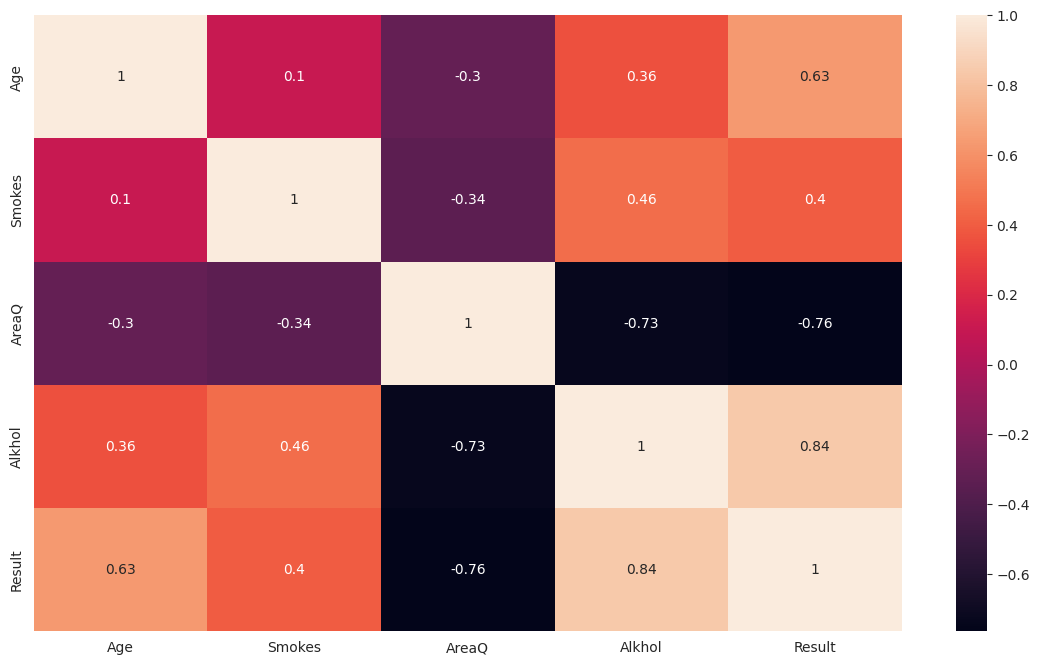

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(method='spearman', min_periods=1),annot=True)

<Axes: title={'center': 'correlation with Result'}>

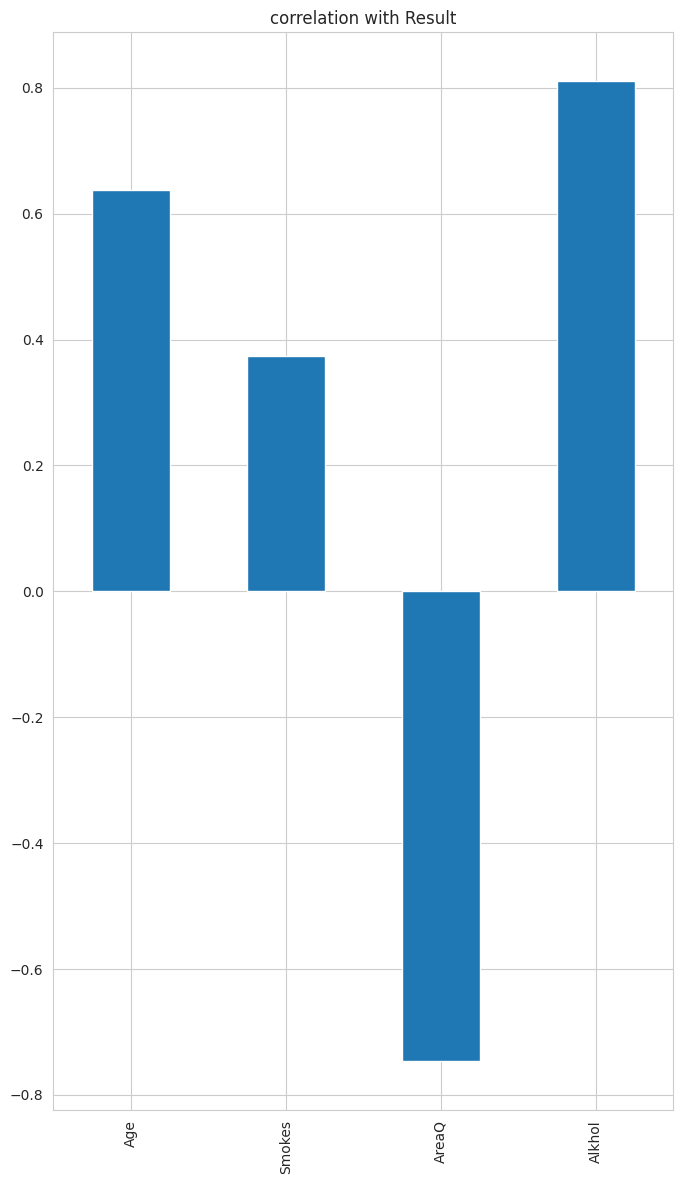

In [17]:
b=data.drop('Result', axis=1)
m=data['Result']
b.corrwith(m).plot(kind='bar' , grid=True, figsize=(8,14), title="correlation with Result")

In [18]:
scaler= StandardScaler()
#  This method fits the scaler to the data and then transforms the data using the computed mean and standard deviation.
b_Standard = scaler.fit_transform(b)
b_Standard

array([[-0.47382073, -1.52435619, -0.08332128,  0.32314781],
       [-0.97080603,  0.62301636, -1.31231015,  0.74683049],
       [-0.78443655, -1.90330429, -0.08332128, -0.52421755],
       [-0.90868287, -1.90330429,  1.14566759, -0.94790023],
       [ 1.57624364, -1.39804016, -0.08332128,  1.17051317],
       [-0.5359439 , -1.90330429,  1.96499351, -1.37158291],
       [ 0.95501201, -0.0085638 ,  1.96499351, -1.37158291],
       [-1.28142185, -0.3875119 , -0.08332128, -0.52421755],
       [ 0.14741089, -1.65067222,  0.32634168, -1.37158291],
       [ 0.58227303,  0.3703843 , -0.49298424,  0.74683049],
       [-0.59806706, -1.39804016,  1.14566759, -1.37158291],
       [-1.5299145 , -0.64014396,  0.32634168, -0.10053487],
       [-1.09505236, -1.65067222, -0.08332128, -0.94790023],
       [-0.90868287,  0.62301636, -1.31231015,  2.01787853],
       [-0.5359439 ,  1.25459653, -0.49298424,  2.01787853],
       [-0.22532808,  0.3703843 ,  1.14566759, -0.94790023],
       [-0.03895859,  0.

In [19]:
pca_model = PCA(n_components=4)
pca_data_standard = pca_model.fit_transform(b_Standard)  # to remove the outliers
pca_data_standard

array([[ 0.56720309,  0.44743051, -1.36935771,  0.51232886],
       [-1.17684166, -1.17867231, -0.87297812, -0.2724187 ],
       [ 1.35033772,  0.43200969, -1.58380782, -0.03410083],
       [ 2.35967647,  0.3437232 , -0.89415846,  0.4166567 ],
       [-0.66114486,  2.04535731, -0.54255174,  0.94928518],
       [ 2.97378747,  0.66741376, -0.19808699,  0.5693424 ],
       [ 1.67494657,  0.84439652,  1.76848347,  0.09260231],
       [ 0.85037608, -0.82659705, -0.77299297, -0.26463863],
       [ 1.69934793,  1.09315973, -0.5885378 , -0.55229432],
       [-1.08926286,  0.24908945,  0.0909357 ,  0.14215211],
       [ 2.30076846,  0.33398549, -0.3167479 , -0.0241529 ],
       [ 1.01637556, -0.90666812, -0.93203682,  0.37851   ],
       [ 1.59938626,  0.04862604, -1.45921703, -0.37363152],
       [-1.97576551, -1.17260154, -1.12165244,  0.68636559],
       [-1.89574059, -1.21687382, -0.08654007,  1.0459503 ],
       [ 1.15386803, -0.36020022,  0.96677538, -0.0567106 ],
       [-1.34723384, -0.

In [20]:
dataset = pd.DataFrame(data=pca_data_standard, columns=['P1','P2','P3','P4'])
dataset['Result'] = data['Result']
#take the first 5 rows of the dataset
print(dataset.head())

         P1        P2        P3        P4  Result
0  0.567203  0.447431 -1.369358  0.512329       1
1 -1.176842 -1.178672 -0.872978 -0.272419       1
2  1.350338  0.432010 -1.583808 -0.034101       0
3  2.359676  0.343723 -0.894158  0.416657       0
4 -0.661145  2.045357 -0.542552  0.949285       1


In [21]:
# divided data to train , test
n=dataset.drop('Result',axis=1)
t=dataset.Result
n_train, n_test, t_train, t_test= train_test_split(n, t, test_size=0.2, random_state=40)

In [22]:
# Function for training and evaluating a classifier
def train_and_evaluate(classifier, n_train, n_test, t_train, t_test):
    """
    Train a classifier, make predictions on the test set, and calculate accuracy.

    Parameters:
    - classifier: The classifier model to be trained and evaluated.
    - X_train: The training data features.
    - X_test: The testing data features.
    - y_train: The training data labels.
    - y_test: The testing data labels.

    Returns:
    - accuracy: The accuracy of the classifier on the test set.
    """
    classifier.fit(n_train, t_train)
    y_pred = classifier.predict(n_test)
    accuracy = accuracy_score(t_test, y_pred)
    return accuracy
n_train, n_test, t_train, t_test= train_test_split(n, t, test_size=0.2, random_state=40)

# Standardize the features (important for PCA and LDA)
scaler = StandardScaler()
#  It calculates the mean and standard deviation of the training data and applies the transformation to standardize the features.
X_train_std = scaler.fit_transform(n_train)
X_test_std = scaler.transform(n_test)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print("Train PCA: ",X_train_pca)
print("Test PCA: ",X_test_pca)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_std, t_train)
X_test_lda = lda.transform(X_test_std)
print("Train LDA: ",X_train_lda)
print("Test LDA: ",X_test_lda)


Train PCA:  [[-2.64092246e-01 -9.05152383e-02]
 [-3.62875305e-01 -6.13133925e-01]
 [ 2.77543643e-01  7.99216743e-01]
 [ 6.46338571e-01 -8.19032047e-01]
 [-1.83875158e+00  3.60300941e-01]
 [-1.86171303e-01 -2.19265198e-01]
 [ 8.89443584e-01  6.03040024e-02]
 [-3.22578967e-01  9.36263590e-01]
 [ 1.30801854e+00 -3.02059569e-01]
 [ 1.47346730e+00  2.61374505e+00]
 [-2.66640797e-01  1.48756610e-01]
 [-6.27643160e-01  1.91508160e-01]
 [-1.24176724e-02  1.20247532e+00]
 [-1.25419037e+00 -9.50249956e-01]
 [-4.99601443e-01 -1.42126685e+00]
 [ 9.07506615e-01  2.01908308e+00]
 [ 8.12324825e-01 -1.76721937e+00]
 [ 2.24063575e+00 -4.15411066e-01]
 [-6.05866917e-01  1.35709999e-01]
 [-5.04445094e-01 -1.25271484e+00]
 [ 4.35075195e-01  1.44462832e+00]
 [ 1.29807779e+00  3.45036130e-01]
 [-9.78501156e-01 -4.56427697e-01]
 [-5.02547019e-03  7.94651472e-01]
 [-1.99964074e+00  8.29944570e-01]
 [-1.08757550e+00  5.69322719e-01]
 [ 2.18587493e+00  1.19357427e+00]
 [ 4.04923224e-01 -7.95456597e-01]
 [-8.530

In [23]:
#Filter methods
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
# Apply SelectKBest with the ANOVA F-value score
selector = SelectKBest(score_func=f_classif, k=2)  # Specify the number of features to keep
X_filtered = selector.fit_transform(n, t)
print(X_filtered)

[[ 0.56720309  0.44743051]
 [-1.17684166 -1.17867231]
 [ 1.35033772  0.43200969]
 [ 2.35967647  0.3437232 ]
 [-0.66114486  2.04535731]
 [ 2.97378747  0.66741376]
 [ 1.67494657  0.84439652]
 [ 0.85037608 -0.82659705]
 [ 1.69934793  1.09315973]
 [-1.08926286  0.24908945]
 [ 2.30076846  0.33398549]
 [ 1.01637556 -0.90666812]
 [ 1.59938626  0.04862604]
 [-1.97576551 -1.17260154]
 [-1.89574059 -1.21687382]
 [ 1.15386803 -0.36020022]
 [-1.34723384 -0.54779355]
 [ 2.13923629 -0.95122559]
 [-0.05466237  1.71148827]
 [-0.61617666  1.8790419 ]
 [-1.17468736  0.64595685]
 [ 1.82155936  0.03658809]
 [ 0.64802595 -1.39127616]
 [ 1.76816743  0.81453892]
 [-1.49464727  2.57968865]
 [ 0.17147933 -1.45773389]
 [ 0.62510693 -0.26628373]
 [ 1.84193239 -0.17906035]
 [-1.70877344  0.27799401]
 [-1.95390744 -0.53973372]
 [ 0.51801546 -0.17647494]
 [-0.99556114  0.34429616]
 [-2.31463125  0.15845721]
 [-1.64856878  0.28519941]
 [ 1.35418035 -0.47986661]
 [ 1.06189653 -1.23715429]
 [-1.31472312  0.48359357]
 

In [24]:
#Wrapper methods
# Apply Recursive Feature Elimination (RFE) with a Random Forest classifier
estimator = RandomForestClassifier()  # Choose the desired classifier
rfe = RFE(estimator, n_features_to_select=2)  # Specify the number of features to select
X_rfe = rfe.fit_transform(n, t)

In [25]:
#Embedded methods
# Apply feature importance using a Random Forest classifier
estimator = RandomForestClassifier()  # Choose the desired classifier
estimator.fit(n, t)
importance = estimator.feature_importances_

# Select the top 2 most important features
indices = importance.argsort()[-2:]  # Get the indices of the top 2 features, sorts the feature importances in descending order
X_embedded = X.iloc[:, indices]

Accuracy Score of Naive Bayes:  91.66666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.89      0.94         9

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



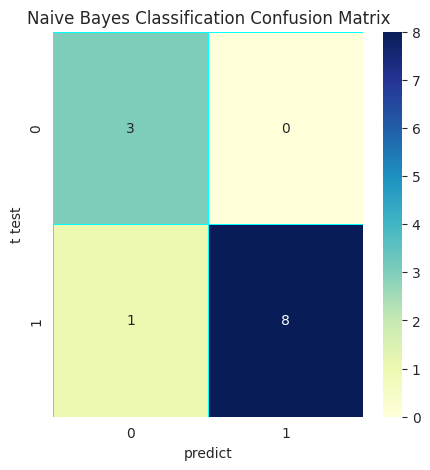

In [26]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()
# We train model
nbcla.fit(n_train, t_train)
# We predict target values
nb_predict = nbcla.predict(n_test)
print("Accuracy Score of Naive Bayes: ", accuracy_score(t_test, nb_predict)*100)
print("Classification Report: " , classification_report(t_test,nb_predict))

# The confusion matrix
nbcla_cm = confusion_matrix(t_test, nb_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('predict')
plt.ylabel('t test')
plt.show()

In [33]:
# Feed-forward Neural Network
# Create a feed-forward neural network model
ffnn_model = Sequential()
ffnn_model.add(Dense(16, input_dim=X_train_std.shape[1], activation='relu'))
ffnn_model.add(Dense(8, activation='relu'))
ffnn_model.add(Dense(1, activation='sigmoid'))
# Compile the model
ffnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
ffnn_model.fit(X_train_std, t_train, epochs=10, batch_size=32)
# Evaluate the model on the test set
ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(X_test_std, t_test)
print("Feed-forward Neural Network Accuracy:", ffnn_accuracy)

# Feedback Neural Network (Recurrent Neural Network)
# Create a recurrent neural network model
rnn_model = Sequential()
rnn_model.add(LSTM(16, input_shape=(X_train_std.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))
# Compile the model
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Reshape the input data for the recurrent neural network
X_train_reshaped = X_train_std.reshape((X_train_std.shape[0], X_train_std.shape[1], 1))
X_test_reshaped = X_test_std.reshape((X_test_std.shape[0], X_test_std.shape[1], 1))
# Train the model
rnn_model.fit(X_train_reshaped, t_train, epochs=10, batch_size=32)
# Evaluate the model on the test set
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_reshaped, t_test)
print("Feedback Neural Network (RNN) Accuracy:", rnn_accuracy)

Epoch 1/10
2/2 [==============================] - 2s 9ms/step - loss: 0.8601 - accuracy: 0.2128
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.8508 - accuracy: 0.2128
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.8428 - accuracy: 0.2340
Epoch 4/10
2/2 [==============================] - 0s 14ms/step - loss: 0.8346 - accuracy: 0.2766
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.8268 - accuracy: 0.2979
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.8194 - accuracy: 0.2979
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.8122 - accuracy: 0.2979
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 0.8044 - accuracy: 0.2979
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 0.7977 - accuracy: 0.2979
Epoch 10/10
2/2 [==============================] - 0s 14ms/step - loss: 0.7905 - accuracy: 0.2979


1/1 [==============================] - 0s 195ms/step - loss: 0.6679 - accuracy: 0.5833
Feed-forward Neural Network Accuracy: 0.5833333134651184
Epoch 1/10
2/2 [==============================] - 4s 10ms/step - loss: 0.6931 - accuracy: 0.5106
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5319
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5745
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.6383
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6869 - accuracy: 0.6383
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6860 - accuracy: 0.6383
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6843 - accuracy: 0.7021
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6831 - accuracy: 0.7021
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6816 - accuracy

1/1 [==============================] - 0s 461ms/step - loss: 0.6934 - accuracy: 0.3333
Feedback Neural Network (RNN) Accuracy: 0.3333333432674408


In [28]:
model = DecisionTreeClassifier()
model.fit(X_train_pca, t_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Step 5: Evaluate the model
accuracy = accuracy_score(t_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4166666666666667


Accuracy Score of Decesion Tree:  91.66666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.89      0.94         9

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



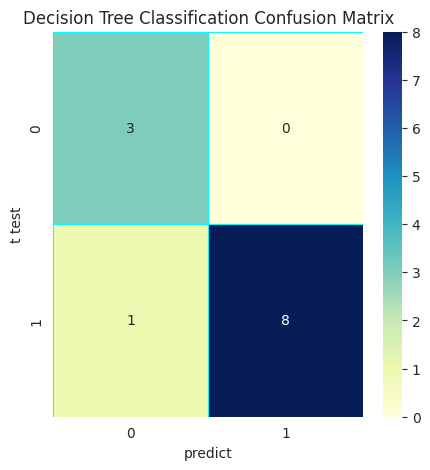

In [29]:
dt=DecisionTreeClassifier()
dt.fit(n_train, t_train)
dt_pred=dt.predict(n_test)
dt_pred.shape

print("Accuracy Score of Decesion Tree: ", accuracy_score(t_test, dt_pred)*100)
print("Classification Report: " , classification_report(t_test,dt_pred))

# The confusion matrix
descision_cm = confusion_matrix(t_test, dt_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(descision_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('predict')
plt.ylabel('t test')
plt.show()

Accuracy: 91.66666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.89      0.94         9

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



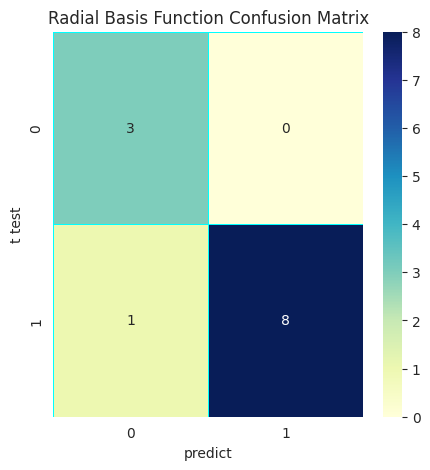

In [30]:
# SVM model with RBF kernel
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)

# Train the model
svm_model.fit(n_train, t_train)

# Make predictions
predictions = svm_model.predict(n_test)

# Calculate accuracy
accuracy = accuracy_score(t_test, predictions)
print("Accuracy:", accuracy*100)
print("Classification Report: " , classification_report(t_test,predictions))

# The confusion matrix
RBF_cm = confusion_matrix(t_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(RBF_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Radial Basis Function Confusion Matrix')
plt.xlabel('predict')
plt.ylabel('t test')
plt.show()

Accuracy Score:  91.66666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.89      0.94         9

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



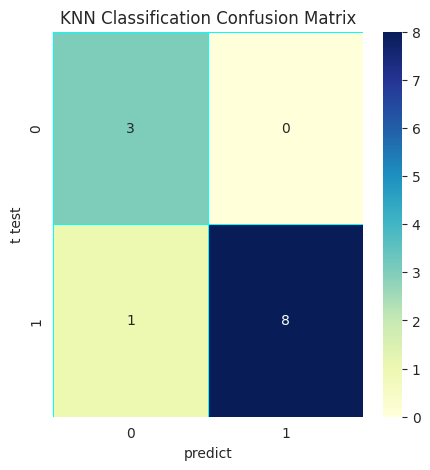

In [34]:
# K Neighbors classification
k_c = KNeighborsClassifier()
k_c.fit(n_train, t_train)
pred=k_c.predict(n_test)

print("Accuracy Score: ", accuracy_score(t_test,pred)*100)
print("Classification Report: " , classification_report(t_test,pred))

# The confusion matrix
knncla_cm = confusion_matrix(t_test, pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('predict')
plt.ylabel('t test')
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize a list to store the evaluation results
evaluation_results = []

# Define a list of distance metrics to be used
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Perform K-NN with different distance metrics
for distance_metric in distance_metrics:
    # Create a K-NN classifier
    knn = KNeighborsClassifier(n_neighbors=5, metric=distance_metric)

    # Train the classifier
    knn.fit(n_train, t_train)

    # Make predictions on the test set
    y_pred = knn.predict(n_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(t_test, y_pred)
    precision = precision_score(t_test, y_pred)
    recall = recall_score(t_test, y_pred)
    f1 = f1_score(t_test, y_pred)

    # Store the evaluation results
    evaluation_results.append({
        'Distance Metric': distance_metric,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Display the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)
print("Evaluation Results:")
print(evaluation_df)

# Perform K-fold cross-validation and calculate average accuracy
k_fold_accuracy = cross_val_score(knn, X, y, cv=5).mean()
print("Average Accuracy (K-fold Cross Validation):", k_fold_accuracy)

Evaluation Results:
  Distance Metric  Accuracy  Precision    Recall  F1 Score
0       euclidean  0.916667        1.0  0.888889  0.941176
1       manhattan  0.916667        1.0  0.888889  0.941176
2       chebyshev  0.916667        1.0  0.888889  0.941176
3       minkowski  0.916667        1.0  0.888889  0.941176
Average Accuracy (K-fold Cross Validation): 0.8818181818181818


In [36]:
knn_pca = KNeighborsClassifier(n_neighbors=3)
# K-fold cross-validation for PCA
cv_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_pca = cross_val_predict(knn_pca, X_train_pca, t_train, cv=cv_pca)
fpr_pca, tpr_pca, _ = roc_curve(t_train, y_pred_pca, pos_label=1)
roc_auc_pca = auc(fpr_pca, tpr_pca)

knn_lda = KNeighborsClassifier(n_neighbors=3)

# K-fold cross-validation for LDA
cv_lda = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_lda = cross_val_predict(knn_lda, X_train_lda, t_train, cv=cv_lda)
fpr_lda, tpr_lda, _ = roc_curve(t_train, y_pred_lda, pos_label=1)
roc_auc_lda = auc(fpr_lda, tpr_lda)

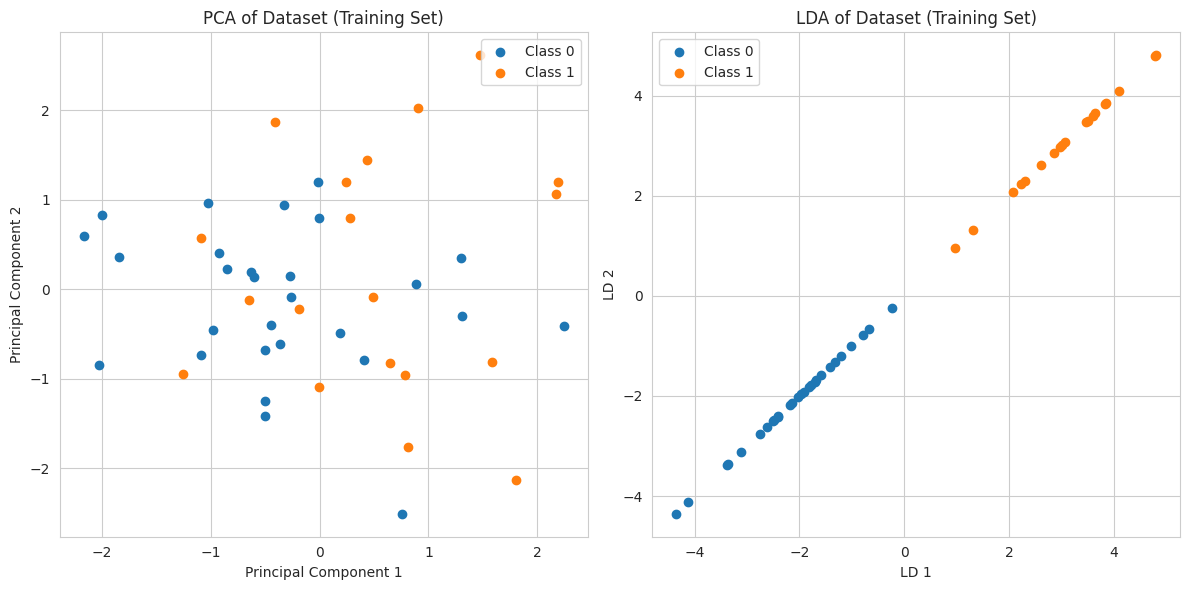

In [ ]:
# Visualize the data after PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label in np.unique(t_train):
    plt.scatter(X_train_pca[t_train == label, 0], X_train_pca[t_train == label, 1], label=f'Class {label}')
plt.title('PCA of Dataset (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Visualize the data after LDA
plt.subplot(1, 2, 2)
for label in np.unique(t_train):
    plt.scatter(X_train_lda[t_train == label, 0], X_train_lda[t_train == label, 0], label=f'Class {label}')
plt.title('LDA of Dataset (Training Set)')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate using PCA features
accuracy_pca = train_and_evaluate(knn_pca, X_train_pca, X_test_pca, t_train, t_test)
print(f'Accuracy using k-NN with PCA: {accuracy_pca:.2%}')

# Evaluate using LDA features
accuracy_lda = train_and_evaluate(knn_lda, X_train_lda, X_test_lda, t_train, t_test)
print(f'Accuracy using k-NN with LDA: {accuracy_lda:.2%}')


Accuracy using k-NN with PCA: 58.33%
Accuracy using k-NN with LDA: 91.67%


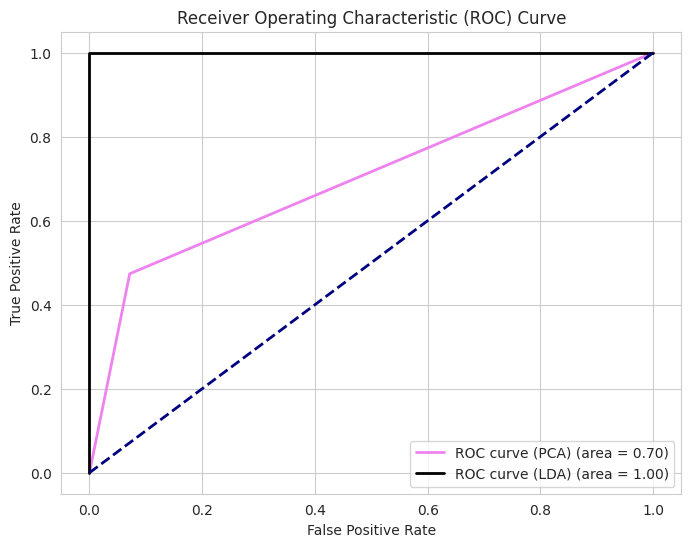

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='violet', lw=2, label=f'ROC curve (PCA) (area = {roc_auc_pca:.2f})')
plt.plot(fpr_lda, tpr_lda, color='black', lw=2, label=f'ROC curve (LDA) (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy Score of Logistic Regression:  91.66666666666666
Classification Report:                precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.89      0.94         9

    accuracy                           0.92        12
   macro avg       0.88      0.94      0.90        12
weighted avg       0.94      0.92      0.92        12



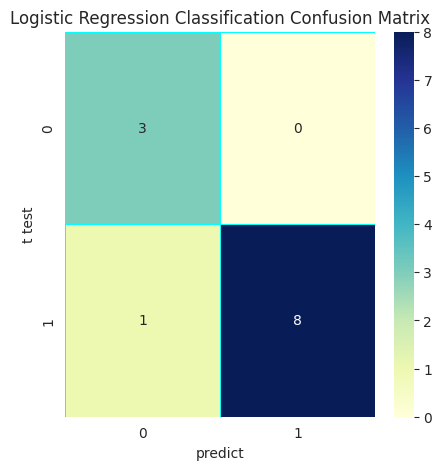

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log = LogisticRegression(solver='liblinear', multi_class='ovr')
log.fit(n_train, t_train)
n_test.shape
log_pred=log.predict(n_test)
log_pred.shape
print("Accuracy Score of Logistic Regression: ", accuracy_score(t_test, log_pred)*100)
print("Classification Report: " , classification_report(t_test,log_pred))

# The confusion matrix
logreg_cm = confusion_matrix(t_test, log_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('predict')
plt.ylabel('t test')
plt.show()

In [ ]:
# Printing the shape of the splitted data

print('The shape of X_train is {}'.format(n_train.shape))
print('The shape of X_test is {}'.format(n_test.shape))
print('The shape of y_train is {}'.format(t_train.shape))
print('The shape of y_test is {}'.format(t_test.shape))

The shape of X_train is (47, 4)
The shape of X_test is (12, 4)
The shape of y_train is (47,)
The shape of y_test is (12,)


In [ ]:
def true_positive(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true positives
    """

    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true negatives
    """

    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of false positives
    """

    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: number of true positives
    """

    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [ ]:
model_d=DecisionTreeClassifier()
model_d.fit(n_train, t_train)
d_pred=model_d.predict(n_test)

print("Accuracy Score of Decesion Tree: ", accuracy_score(t_test, dt_pred)*100)

Accuracy Score of Decesion Tree:  91.66666666666666


In [ ]:
def accuracy_score(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: accuracy score
    """

    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)

    accuracy_score = (tp+tn)/(tp+tn+fp+fn)
    return accuracy_score

accuracy_score(t_test, d_pred)

0.9166666666666666

In [ ]:
def precision(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: precision score
    """

    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp/(tp+fp)
    return precision

precision(t_test, d_pred)

1.0

In [ ]:
def recall(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: recall score
    """

    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp/(tp+fn)
    return recall

recall(t_test, d_pred)

0.8888888888888888

In [ ]:
def f1(y_true, y_pred):
    """
    Function to calculate the True Positive
    : param y_true: list of true values
    : param y_pred: list of predicted values
    : return: f1 score
    """

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    score = 2*p*r/(p+r)

    return score

f1(t_test, d_pred)

0.9411764705882353

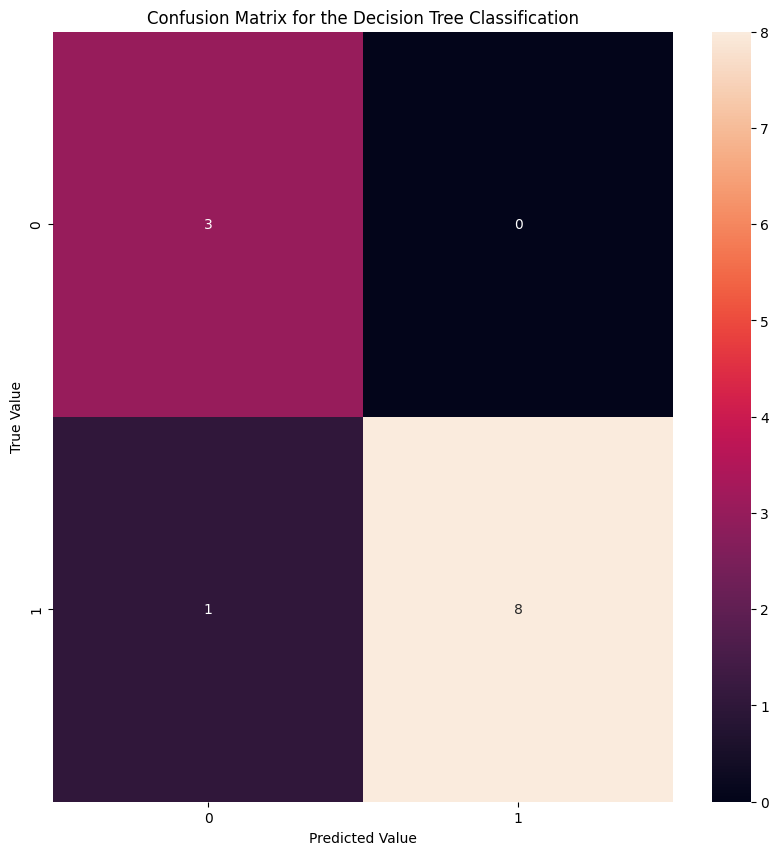

In [ ]:
# Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(t_test, d_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, ax = ax)
plt.title('Confusion Matrix for the Decision Tree Classification')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Error Rate: 0.08333333333333337


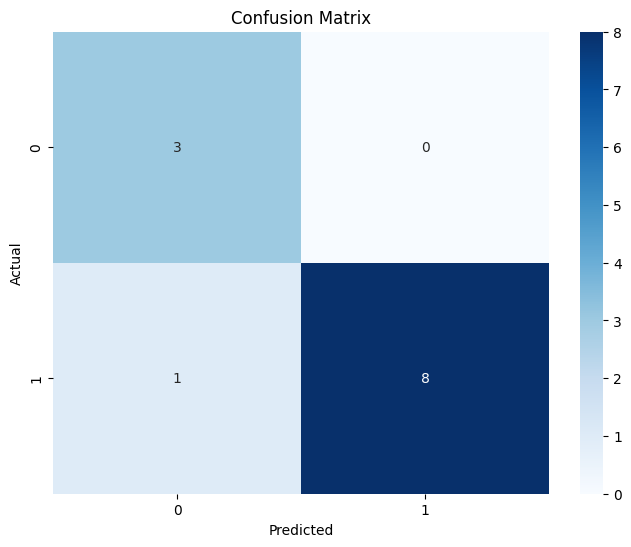

In [ ]:
# Calculate the error rate
error_rate = 1 - np.mean(d_pred == t_test)
print("Error Rate:", error_rate)

# Create a confusion matrix
confusion_mat = confusion_matrix(t_test, d_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
# Create a K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Train the classifier
knn.fit(n_train, t_train)
# Make predictions on the test set
m_pred = knn.predict(n_test)

# Determine if the model is overfitting or underfitting
train_score = knn.score(n_train, t_train)
test_score = knn.score(n_test, t_test)

if train_score > test_score:
    print("The model is overfitting.")
elif train_score < test_score:
    print("The model is underfitting.")
else:
    print("The model is neither overfitting nor underfitting.")

The model is overfitting.


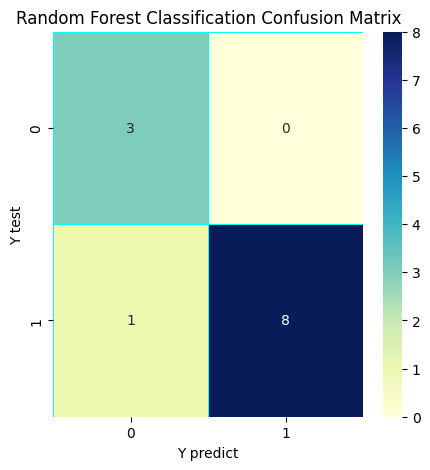

0.9166666666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(n_train, t_train)

# We predict target values
Y_predict5 = rfcla.predict(n_test)
# The confusion matrix
rfcla_cm = confusion_matrix(t_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
# Test score
score_rfcla = rfcla.score(n_test, t_test)
print(score_rfcla)